In [17]:
import requests
import json

from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import networkx as nx

from Bio import Entrez

In [2]:
Entrez.email = "sjt0332@gmail.com"
handle = Entrez.einfo()
result = handle.read()

In [ ]:
print(result.decode('utf-8'))

In [ ]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record.keys()

In [ ]:
record["DbList"]

In [ ]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
record["DbInfo"]["Description"]

In [ ]:
record["DbInfo"]["Count"]

In [ ]:
record["DbInfo"]["LastUpdate"]

In [ ]:
handle = Entrez.esearch(db="pubmed", term="aging")
record = Entrez.read(handle)
record["Count"]

## 암유전자

In [2]:
Entrez.email = "sjt0332@gmail.com"

In [3]:
term = "BRCA"

handle = Entrez.esearch(db="gene", term=term)
record = Entrez.read(handle)

In [ ]:
idlist = record["IdList"]
idlist

In [4]:
idlist = ['7157']

In [6]:
handle = Entrez.efetch(db="gene", id=idlist, retmode="xml")
records = Entrez.read(handle)

In [7]:
len(records)

1

In [10]:
len(records[0])

14

In [13]:
type(records[0])

Bio.Entrez.Parser.DictionaryElement

In [16]:
records[0].keys()

dict_keys(['Entrezgene_track-info', 'Entrezgene_type', 'Entrezgene_source', 'Entrezgene_gene', 'Entrezgene_prot', 'Entrezgene_summary', 'Entrezgene_location', 'Entrezgene_gene-source', 'Entrezgene_locus', 'Entrezgene_properties', 'Entrezgene_comments', 'Entrezgene_unique-keys', 'Entrezgene_xtra-index-terms', 'Entrezgene_xtra-properties'])

In [17]:
records[0]['Entrezgene_track-info']

{'Gene-track': {'Gene-track_geneid': '7157', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1998', 'Date-std_month': '8', 'Date-std_day': '13'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2024', 'Date-std_month': '9', 'Date-std_day': '12', 'Date-std_hour': '20', 'Date-std_minute': '18', 'Date-std_second': '0'}}}}}}

In [18]:
records[0]['Entrezgene_type']

StringElement('6', attributes={'value': 'protein-coding'})

In [19]:
records[0]['Entrezgene_source']

{'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'BinomialOrgName_species': 'sapiens'}}}, 'OrgName_attrib': 'specified', 'OrgName_lineage': 'Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae; Homo', 'OrgName_gcode': '1', 'OrgName_mgcode': '2', 'OrgName_div': 'PRI'}}}}, 'BioSource_subtype': [{'SubSource_subtype': StringElement('1', attributes={'value': 'chromosome'}), 'SubSource_name': '17'}]}}

In [20]:
records[0]['Entrezgene_gene']

{'Gene-ref': {'Gene-ref_locus': 'TP53', 'Gene-ref_desc': 'tumor protein p53', 'Gene-ref_maploc': '17p13.1', 'Gene-ref_db': [{'Dbtag_db': 'HGNC', 'Dbtag_tag': {'Object-id': {'Object-id_str': 'HGNC:11998'}}}, {'Dbtag_db': 'Ensembl', 'Dbtag_tag': {'Object-id': {'Object-id_str': 'ENSG00000141510'}}}, {'Dbtag_db': 'MIM', 'Dbtag_tag': {'Object-id': {'Object-id_id': '191170'}}}, {'Dbtag_db': 'AllianceGenome', 'Dbtag_tag': {'Object-id': {'Object-id_str': 'HGNC:11998'}}}], 'Gene-ref_syn': ['P53', 'BCC7', 'LFS1', 'BMFS5', 'TRP53'], 'Gene-ref_formal-name': {'Gene-nomenclature': {'Gene-nomenclature_status': StringElement('', attributes={'value': 'official'}), 'Gene-nomenclature_symbol': 'TP53', 'Gene-nomenclature_name': 'tumor protein p53', 'Gene-nomenclature_source': {'Dbtag': {'Dbtag_db': 'HGNC', 'Dbtag_tag': {'Object-id': {'Object-id_str': 'HGNC:11998'}}}}}}}}

In [23]:
print(records[0]['Entrezgene_summary'].replace(',','\n'))

This gene encodes a tumor suppressor protein containing transcriptional activation
 DNA binding
 and oligomerization domains. The encoded protein responds to diverse cellular stresses to regulate expression of target genes
 thereby inducing cell cycle arrest
 apoptosis
 senescence
 DNA repair
 or changes in metabolism. Mutations in this gene are associated with a variety of human cancers
 including hereditary cancers such as Li-Fraumeni syndrome. Alternative splicing of this gene and the use of alternate promoters result in multiple transcript variants and isoforms. Additional isoforms have also been shown to result from the use of alternate translation initiation codons from identical transcript variants (PMIDs: 12032546
 20937277). [provided by RefSeq
 Dec 2016]


In [14]:
with open('test.txt', 'w') as f:
    f.write(record.decode('utf-8'))

AttributeError: 'DictionaryElement' object has no attribute 'decode'

In [ ]:
records

In [ ]:
handle = Entrez.einfo()
result = handle.read()

### STRING DB

In [4]:
protein_list = ['SIRT1','RPA1','MDM2','CREBBP','EP300','DAXX','ATM','HSP90AA1','SFN','TP53BP2']
proteins = '%0d'.join(protein_list)
proteins

'SIRT1%0dRPA1%0dMDM2%0dCREBBP%0dEP300%0dDAXX%0dATM%0dHSP90AA1%0dSFN%0dTP53BP2'

In [5]:
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [8]:
lines = r.text.split('\n')
data = [l.split('\t') for l in lines]

df = pd.DataFrame(data[1:-1], columns = data[0]) 

interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

In [9]:
df

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000212015,9606.ENSP00000254719,SIRT1,RPA1,9606,0.412,0,0,0,0.089,0.317,0,0.13
1,9606.ENSP00000212015,9606.ENSP00000258149,SIRT1,MDM2,9606,0.699,0,0,0,0,0.292,0,0.592
2,9606.ENSP00000212015,9606.ENSP00000262367,SIRT1,CREBBP,9606,0.754,0,0,0,0.088,0.101,0,0.724
3,9606.ENSP00000212015,9606.ENSP00000335153,SIRT1,HSP90AA1,9606,0.803,0,0,0,0.047,0.394,0,0.686
4,9606.ENSP00000212015,9606.ENSP00000278616,SIRT1,ATM,9606,0.856,0,0,0,0.049,0,0,0.855
5,9606.ENSP00000212015,9606.ENSP00000263253,SIRT1,EP300,9606,0.972,0,0,0,0.138,0.698,0,0.902
6,9606.ENSP00000254719,9606.ENSP00000263253,RPA1,EP300,9606,0.466,0,0,0,0.047,0.133,0,0.406
7,9606.ENSP00000254719,9606.ENSP00000278616,RPA1,ATM,9606,0.928,0,0,0,0.047,0.66,0.5,0.611
8,9606.ENSP00000258149,9606.ENSP00000262367,MDM2,CREBBP,9606,0.909,0,0,0,0.122,0.625,0,0.746
9,9606.ENSP00000258149,9606.ENSP00000335153,MDM2,HSP90AA1,9606,0.909,0,0,0,0.049,0.539,0,0.81


In [10]:
interactions

,preferredName_A,preferredName_B,score
0,SIRT1,RPA1,0.412
1,SIRT1,MDM2,0.699
2,SIRT1,CREBBP,0.754
3,SIRT1,HSP90AA1,0.803
4,SIRT1,ATM,0.856
5,SIRT1,EP300,0.972
6,RPA1,EP300,0.466
7,RPA1,ATM,0.928
8,MDM2,CREBBP,0.909
9,MDM2,HSP90AA1,0.909


In [13]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] 
    b = interaction[1] 
    w = float(interaction[2]) 
    G.add_weighted_edges_from([(a,b,w)]) 

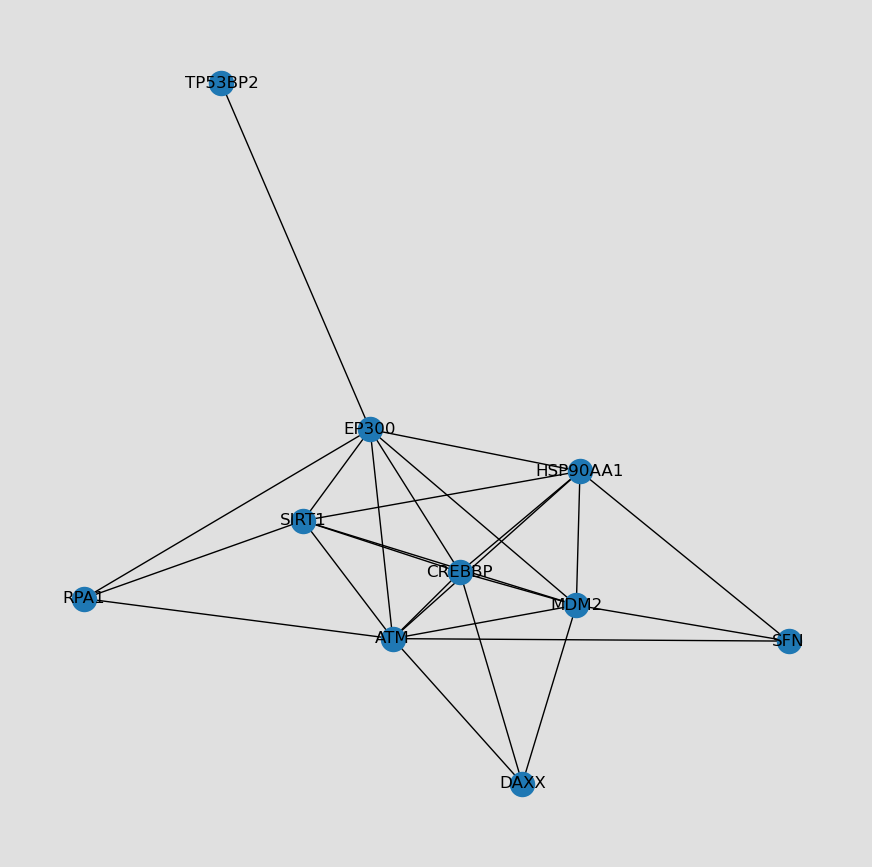

In [14]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [15]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.0,0.9) 
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,7000)
# edge width shows 1-weight to convert cost back to strength of interaction 
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]

/tmp/ipykernel_2019/1003370197.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  graph_colormap = cm.get_cmap('plasma', 12)


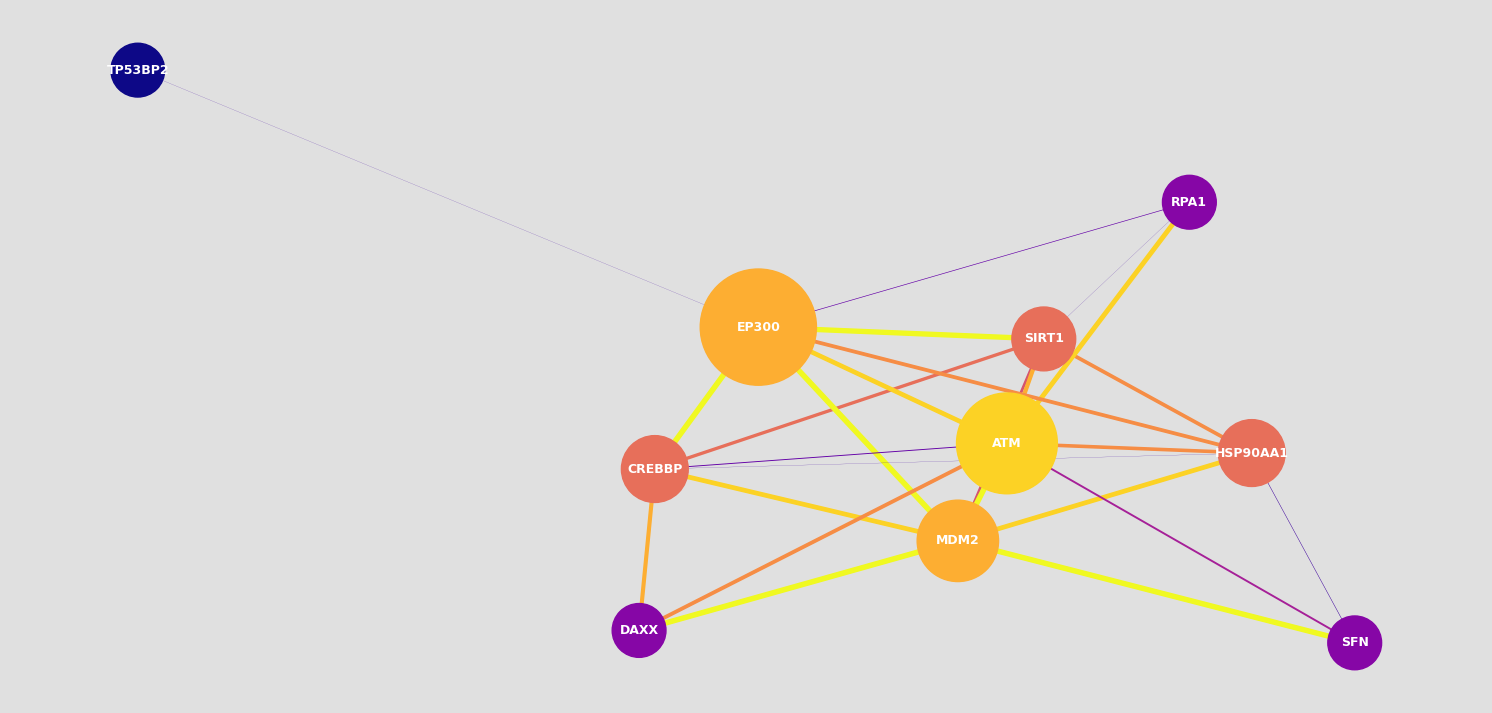

In [16]:
pos = nx.spring_layout(G)
plt.figure(figsize=(19,9),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()

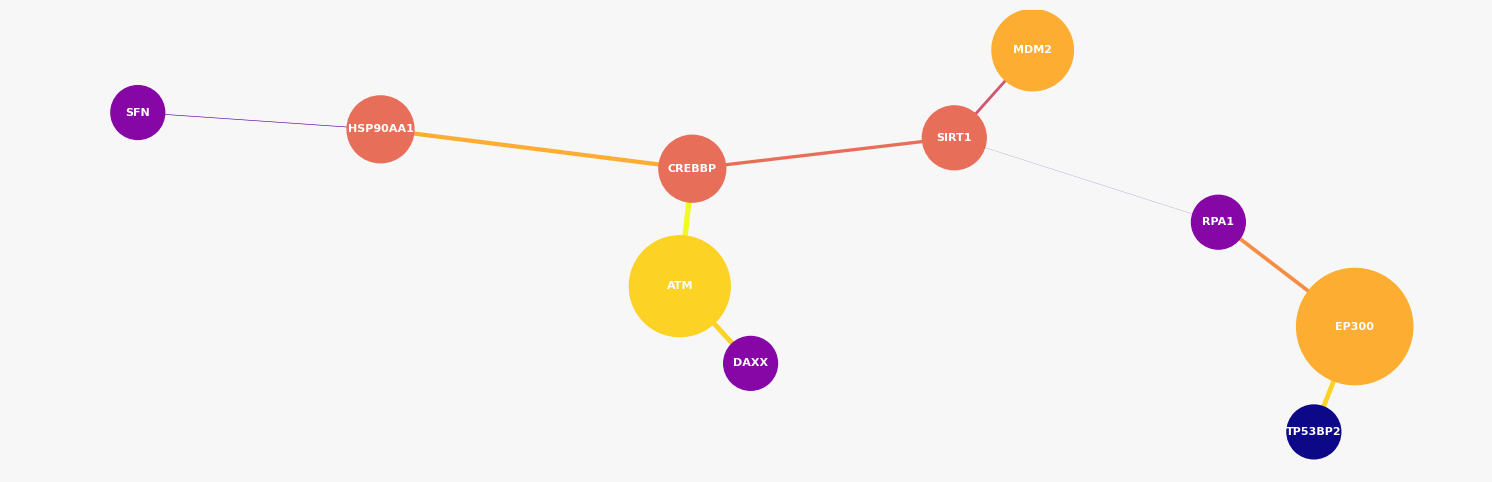

In [18]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(19,6),facecolor=[0.7,0.7,0.7,0.1])
nx.draw_networkx(T, pos=pos, with_labels=True,node_color=c,node_size=s,edge_color= ec,width=ew,
                font_color='white',font_weight='bold',font_size='8')
plt.axis('off')
plt.show()

### REACTOME

In [19]:
identifier = 'R-HSA-69488'

url = 'https://reactome.org/AnalysisService/identifier/' + identifier
r = requests.get(url)
r

<Response [200]>

In [20]:
r.text

'{"summary":{"token":"MjAyNDA5MTgxMzQ4MjVfMzA3Mjk%3D","projection":false,"interactors":false,"type":"OVERREPRESENTATION","sampleName":"","text":true,"includeDisease":true},"expression":{"columnNames":[]},"identifiersNotFound":1,"pathwaysFound":0,"pathways":[],"resourceSummary":[{"resource":"TOTAL","pathways":0,"filtered":0}],"speciesSummary":[],"warnings":[]}'

In [44]:
id = 'R-HSA-69488'

url = 'https://reactome.org/ContentService/data/query/enhanced/{id}'
r = requests.get(url.format(id=id))
r

<Response [200]>

In [45]:
r.text

'{"dbId":69488,"displayName":"TP53 [nucleoplasm]","stId":"R-HSA-69488","stIdVersion":"R-HSA-69488.1","modified":{"dbId":3322334,"displayName":"Wu, G, 2013-05-03","dateTime":"2013-05-03 22:44:13","className":"InstanceEdit","schemaClass":"InstanceEdit"},"name":["TP53","p53 protein","P53_HUMAN","Cellular tumor antigen p53","Tumor suppressor p53","Phosphoprotein p53","Antigen NY-CO-13"],"speciesName":"Homo sapiens","compartment":[{"dbId":7660,"displayName":"nucleoplasm","accession":"0005654","databaseName":"GO","definition":"That part of the nuclear content other than the chromosomes or the nucleolus.","name":"nucleoplasm","url":"https://www.ebi.ac.uk/QuickGO/term/GO:0005654","className":"Compartment","schemaClass":"Compartment"}],"inferredTo":[{"dbId":9974518,"displayName":"TP53 [nucleoplasm]","stId":"R-MMU-69488","stIdVersion":"R-MMU-69488.1","name":["TP53","P02340"],"speciesName":"Mus musculus","inferredFrom":[69488],"species":{"dbId":48892,"displayName":"Mus musculus","name":["Mus musc

### KEGG

In [4]:
orthology_id = 'K04451'

url = f"http://rest.kegg.jp/get/{orthology_id}"
r = requests.get(url)
r

<Response [200]>

In [6]:
print(r.text)

ENTRY       K04451                      KO
SYMBOL      TP53, P53
NAME        tumor protein p53
PATHWAY     map01522  Endocrine resistance
            map01524  Platinum drug resistance
            map04010  MAPK signaling pathway
            map04071  Sphingolipid signaling pathway
            map04110  Cell cycle
            map04115  p53 signaling pathway
            map04137  Mitophagy - animal
            map04151  PI3K-Akt signaling pathway
            map04210  Apoptosis
            map04211  Longevity regulating pathway
            map04216  Ferroptosis
            map04218  Cellular senescence
            map04310  Wnt signaling pathway
            map04722  Neurotrophin signaling pathway
            map04919  Thyroid hormone signaling pathway
            map05012  Parkinson disease
            map05014  Amyotrophic lateral sclerosis
            map05016  Huntington disease
            map05131  Shigellosis
            map05160  Hepatitis C
            map05161  Hepatitis B
   

### TCGA

In [4]:
file_endpt = 'https://api.gdc.cancer.gov/files/'
file_uuid = 'cb92f61d-041c-4424-a3e9-891b7545f351'
response = requests.get(file_endpt + file_uuid)

print(json.dumps(response.json(), indent=2))

{
  "data": {
    "data_format": "MAF",
    "access": "open",
    "file_name": "f3f4f12a-f8bf-4fd7-be7e-f0cef6f98e73.wxs.aliquot_ensemble_masked.maf.gz",
    "submitter_id": "ce8f00fe-9ea0-4bd1-890e-bb5663ef8fa6",
    "data_category": "Simple Nucleotide Variation",
    "acl": [
      "open"
    ],
    "type": "masked_somatic_mutation",
    "platform": "Illumina",
    "file_size": 22051,
    "created_datetime": "2022-08-01T13:36:20.671399-05:00",
    "md5sum": "79fb070ece0a269f9646edc7c354ed8a",
    "updated_datetime": "2024-07-31T03:41:10.985582-05:00",
    "file_id": "cb92f61d-041c-4424-a3e9-891b7545f351",
    "data_type": "Masked Somatic Mutation",
    "state": "released",
    "experimental_strategy": "WXS",
    "version": "2",
    "data_release": "35.0 - 41.0"
  },
  "warnings": {}
}


### COSMIC


In [17]:
gene = 'TP53'

url = f'https://clinicaltables.nlm.nih.gov/api/cosmic/v4/search?terms={gene}'

response = requests.get(url)

response

<Response [200]>

In [18]:
response.text

'[10000,["60592752","51191564","22964589","59976813","60733244","23085261","50910723"],null,[["60592752","TP53","c.*53del","p.?"],["51191564","TP53","c.*53T>G","p.?"],["22964589","TP53","c.*53C>T","p.?"],["59976813","TP53","c.*53C>T","p.?"],["60733244","TP53","c.993+53A>T","p.?"],["23085261","TP53","c.993+53A>T","p.?"],["50910723","TP53","c.993+53A>T","p.?"]]]'

In [ ]:
[
    10000,
    ["60592752","51191564","22964589","59976813","60733244","23085261","50910723"],
    null,
    [
        ["60592752","TP53","c.*53del","p.?"],
        ["51191564","TP53","c.*53T>G","p.?"],
        ["22964589","TP53","c.*53C>T","p.?"],
        ["59976813","TP53","c.*53C>T","p.?"],
        ["60733244","TP53","c.993+53A>T","p.?"],
        ["23085261","TP53","c.993+53A>T","p.?"],
        ["50910723","TP53","c.993+53A>T","p.?"]
        ]
]

### Clinvar

In [4]:
df_tp53_var = pd.read_csv('/home/sjt/space/github/bioinformatics/data/clinvar_result.txt', sep='\t')
df_tp53_var

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,GRCh37/hg19 17p13.1(chr17:6650649-8040151)x3,TMEM102|TNFSF12|TNFSF12-TNFSF13|TMEM256|TMEM88...,NaN,not provided,VCV000980123,17,6650649 - 8040151,NaN,NaN,980123,...,Pathogenic,"Sep 6, 2019",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRCh37/hg19 17p13.1(chr17:6934163-8217978)x1,ACADVL|ACAP1|ALOX12B|ALOX15B|ALOXE3|ARHGEF15|A...,NaN,Poly (ADP-Ribose) polymerase inhibitor response,VCV000523158,17,6934163 - 8217978,NaN,NaN,523158,...,drug response,"Nov 27, 2017",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRCh37/hg19 17p13.1(chr17:7004894-7766789)x1,ACADVL|ACAP1|ASGR1|ASGR2|ATP1B2|CD68|CHRNB1|CL...,NaN,not provided,VCV002498727,17,7004894 - 7766789,NaN,NaN,2498727,...,Pathogenic,"Mar 1, 2023","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRCh37/hg19 17p13.1(chr17:7020054-8086290),ACADVL|ACAP1|ALOX12B|ALOX15B|ALOXE3|ASGR1|ATP1...,NaN,not specified,VCV001526566,17,7020054 - 8086290,NaN,NaN,1526566,...,Pathogenic,"Mar 1, 2022","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GRCh37/hg19 17p13.1(chr17:7241916-8692213),ACAP1|ALOX12B|ALOX15B|ALOXE3|ARHGEF15|ATP1B2|A...,NaN,not specified,VCV001526567,17,7241916 - 8692213,NaN,NaN,1526567,...,Pathogenic,"Mar 1, 2022","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,NM_018081.2(WRAP53):c.-206G>A,TP53|WRAP53,NaN,"Li-Fraumeni syndrome|Dyskeratosis congenita, a...",VCV000369236,17,7591761,17,7688443,369236,...,Benign/Likely benign,"Jan 12, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3458,NM_018081.2(WRAP53):c.-245G>C,LOC130060173|TP53|WRAP53,NaN,"Li-Fraumeni syndrome|Dyskeratosis congenita, a...",VCV000369235,17,7591722,17,7688404,369235,...,Benign/Likely benign,"Jan 13, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3459,Single allele,TP53,NaN,Li-Fraumeni syndrome,VCV000870289,NaN,NaN,NaN,NaN,870289,...,Pathogenic,"Jun 30, 2019","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3460,"TP53, 1-BP DEL, CODON 257",TP53,NaN,Li-Fraumeni syndrome 1,VCV000012373,NaN,NaN,NaN,NaN,12373,...,Pathogenic,"Apr 1, 1994",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_tp53_var.columns

Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

In [18]:
Counter(df_tp53_var['Protein change']).most_common

[(nan, 1447),
 ('D145fs, D184fs, D25fs, D52fs', 6),
 ('W14*, W53*', 5),
 ('F109fs, F70fs', 5),
 ('Q13fs, Q52fs', 4),
 ('G115fs, G154fs, G22fs', 4),
 ('H139fs, H178fs, H19fs, H46fs', 4),
 ('L35fs', 3),
 ('A37fs, A76fs', 3),
 ('P43fs, P82fs', 3),
 ('A83fs, A44fs', 3),
 ('S9R', 3),
 ('S51fs, S90fs', 3),
 ('S60fs, S99fs', 3),
 ('Y103*, Y64*', 3),
 ('R110fs, R71fs', 3),
 ('L111fs, L72fs', 3),
 ('H76fs, H115fs', 3),
 ('Y126fs, Y87fs', 3),
 ('Y126*, Y87*', 3)]

In [23]:
df_tp53_var['Protein change'].fillna('')

0        
1        
2        
3        
4        
       ..
3457     
3458     
3459     
3460     
3461     
Name: Protein change, Length: 3462, dtype: object

In [30]:
df_tp53_var['Protein change'].fillna('')[1000]

'R110fs, R71fs'

In [31]:
'Y107H, Y68H'.find(',')

5

In [32]:
m = df_tp53_var['Protein change'] == 'Y107H, Y68H'

df_tp53_var['Protein change'][m]

122    Y107H, Y68H
Name: Protein change, dtype: object

In [ ]:
[str(s) for s in df_tp53_var['Protein change'].fillna('')]

In [ ]:
dic_var = dict()
for i in [str(_) for _ in df_tp53_var['Protein change'].fillna('')]:
    if i.find(',') == -1:
        if i.strip() not in dic_var:
            dic_var[i.strip()] = 1
        else:
            dic_var[i.strip()] += 1
    else:
        for j in i.split(','):
            if j.strip() not in dic_var:
                dic_var[j.strip()] = 1
            else:
                dic_var[j.strip()] += 1
dic_var

In [43]:
len(dic_var)

5246

In [44]:
Counter(dic_var).most_common(20)

[('', 1447),
 ('M1fs', 11),
 ('W14*', 7),
 ('S56fs', 7),
 ('N131fs', 7),
 ('D145fs', 7),
 ('D184fs', 7),
 ('D25fs', 7),
 ('D52fs', 7),
 ('F109fs', 6),
 ('F70fs', 6),
 ('G22fs', 6),
 ('G115fs', 6),
 ('G154fs', 6),
 ('H139fs', 6),
 ('H178fs', 6),
 ('H19fs', 6),
 ('H46fs', 6),
 ('L35fs', 5),
 ('Q52fs', 5)]

In [45]:
dic_var['R249S']

2